Following [here](https://statsthinking21.github.io/statsthinking21-python/08-HypothesisTesting.html)

[Other reference](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [30]:
# Import packages

import numpy as np
import pandas as pd
import scipy.stats as sds
import matplotlib.pyplot as plt

In [25]:
def extract_talks_by_year(year):
    
    #Check if year is in list: 
    event_name = 'TED' + str(year)
    assert (event_name in events), "There are no talks in our database from the requested year"
    
    event_year = all_talks[all_talks['event'] == event_name]
    
    return event_year

def extract_speakers_by_year(year):
    
    talks_year = extract_talks_by_year(year)
    event_speakers = talks_year[['speaker_1', 'speaker_2', 'speaker_3', 'speaker_4']]
    
    speaker_list = []
    
    for role in ['speaker_1', 'speaker_2', 'speaker_3', 'speaker_4']:
        event_speakers = event_year[role].dropna()
        event_speakers = event_speakers.unique()
        speaker_list.extend(list(event_speakers))
        
    speaker_pd = pd.Series(speaker_list)
    speaker_pd = speaker_pd.unique()
    
    speaker_year = list(speaker_pd)
    ## Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
    
    return speaker_year
    
    
def prop_women_by_year(year):
    
    speaker_year = extract_speakers_by_year(year)
    gender_year = speakers.loc[speaker_year]
    gender_counts = gender_year.groupby(["Gender_handcheck"])["Gender_handcheck"].count()
    ## Ref: https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
    
    total_single_speaker = gender_counts["male"] + gender_counts["female"]
    # Excluding groups of speakers (like a band or troupe)
    prop_women_single = gender_counts["female"]/total_single_speaker
    
    return prop_women_single, total_single_speaker

In [33]:
# Create the sampling distributions

## Ref: https://statsthinking21.github.io/statsthinking21-python/08-HypothesisTesting.html

def generate_one_sample_prop(num_sample = 100, null_prop = 0.5):
    
    samp = np.random.rand(num_sample) > (1 - null_prop)
    return np.sum(samp)/num_sample

def generate_sampling_dist(num_runs = 5000, num_sample = 100, null_prop = 0.5):
    
    sampling_dist_df = pd.DataFrame({'props': np.zeros(num_runs)})
    
    for i in range(num_runs):
        sampling_dist_df.loc[i, 'props'] = generate_one_sample_prop(num_sample, null_prop)
        
    return sampling_dist_df



In [19]:
# Import talk data

# Load binary gendered talks 
talks_male = pd.read_csv('talks_male.csv', index_col='Talk_ID')
talks_female = pd.read_csv('talks_female.csv', index_col='Talk_ID')

# No one gender ==> NOG
talks_nog = pd.read_csv('talks_nog.csv', index_col='Talk_ID')

# Concatenate the talk data
all_talks = pd.concat([talks_male,talks_female,talks_nog])

In [20]:
# Import speaker data

speakers = pd.read_csv('speakers_with_gender.csv', index_col='speaker')

In [21]:
# Create list of events

events = list(all_talks['event'].unique())

In [23]:
## Tests

year = 2007

In [26]:
print(prop_women_by_year(year))

(0.23076923076923078, 65)


In [34]:
sampling_dist = generate_sampling_dist(num_runs = 1000, num_sample = 65, null_prop = 0.5)

In [36]:
sampling_dist.shape

(1000, 1)

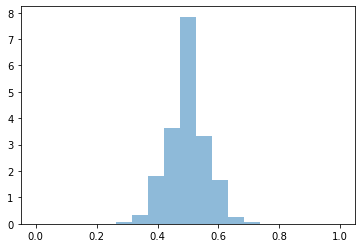

In [39]:
bins = np.linspace(0,1,20)
plt.hist(sampling_dist, bins, density=True, alpha=0.5, label = "sampling dist")
plt.show()

#add single point!

In [5]:
year = '2007'
event_name = 'TED' + str(year)
event_name

'TED2007'

In [6]:
event_year = all_talks[all_talks['event'] == 'TED2007']


In [11]:
speaker_list = extract_speakers_by_year(2007)

# How to check if the list is unique?? Extend somehow? 
# Done see above

In [16]:
gender_year = speakers.loc[speaker_list]
gender_counts = gender_year.groupby(["Gender_handcheck"])["Gender_handcheck"].count()

gender_counts["male"]

50

In [13]:
gender_counts.sum()

66

In [17]:
gender_counts["male"], gender_counts["female"]

(50, 15)